<a href="https://colab.research.google.com/github/Bogdan0002/DanishCrown_export_analysis/blob/main/DCexport_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exports of Animals by Danish Crown.
The data file in this repo contains records of all exports of pigs from Denmark from 1 June 2012 to 30 November 2022.

The file contains the following columns:

transport_date: date on which the export happened;
transport_time: time on which the export departed from the sender;
sender_id: id for the sender of the transport;
recipient_country: country code for the recipient country for the transport;
num_animals: number of animals on the transport;
reporting_datetime: date and time stamp for when the transport is reported to the authorities;

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
# read the CSV file
df = pd.read_csv("all_exports.csv")

# print the first few rows of the DataFrame
print(df.head())

  transport_date  transport_time  sender_id recipient_country  num_animals  \
0     2012-05-31            1315         80                PL          349   
1     2012-05-31            1315         80                PL          299   
2     2012-05-29             800        288                BE           97   
3     2012-05-29             800        288                BE           24   
4     2012-05-31             800        288                FR           12   

    reporting_datetime  
0  2012-06-01 15:12:26  
1  2012-06-01 15:15:34  
2  2012-06-04 10:15:57  
3  2012-06-04 10:15:57  
4  2012-06-04 10:15:57  


Clean the DataFrame

In [51]:

# check for missing or null values
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)


transport_date        0
transport_time        0
sender_id             0
recipient_country     0
num_animals           0
reporting_datetime    0
dtype: int64


In [52]:
# check for duplicate rows
print(df.duplicated().sum())

# drop duplicate rows
df.drop_duplicates(inplace=True)


5741


In [53]:
# check for outliers using the statistical method z-score and remove them 
z = np.abs(stats.zscore(df['num_animals']))
threshold = 3
outliers = np.where(z > threshold)[0]
print(outliers)

# drop outliers
df.drop(df.index[outliers], inplace=True)

[    15   1358   3353 ... 344553 344629 344630]


Analysis

In [55]:
# AVERAGE NUMBER OF ANIMALS ON EACH TRANSPORT
avg_num_animals = df["num_animals"].mean()

print("The average number of animals on each transport is:", avg_num_animals)

The average number of animals on each transport is: 398.8699634339482


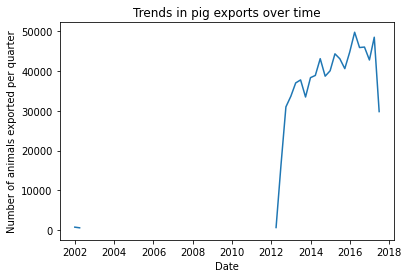

In [56]:
# TREND IN PIG EXPORTS OVER TIME

# resample the DataFrame to a quarterly frequency and calculate the mean of each quarter
quarterly_means = daily_totals.resample('Q').mean()

# plot the quarterly mean number of animals exported over time
plt.plot(quarterly_means.index, quarterly_means['num_animals'])
plt.xlabel('Date')
plt.ylabel('Number of animals exported per quarter')
plt.title('Trends in pig exports over time')
plt.show()


In [57]:
# TOTAL EXPORT BY COUNTRY AND THE TOP COUNTRIES

# group the data by recipient_country and sum the num_animals column for each country
country_totals = df.groupby('recipient_country')['num_animals'].sum()

# sort the results in descending order to find the top countries
top_countries = country_totals.sort_values(ascending=False).head(10)

print(top_countries)

recipient_country
DE    65611156
PL    54813954
IT     8392032
RO     1644849
HR     1440901
CZ     1180294
ES     1024161
HU      839143
RS      558195
SK      276234
Name: num_animals, dtype: int64


In [58]:
# TOTAL TRANSPORTED ANIMALS BY EACH SENDER PER COUNTRY

# create a new dataframe grouped by sender_id and recipient_country, with the sum of num_animals for each group
sender_country_df = df.groupby(['sender_id', 'recipient_country']).agg({'num_animals': 'sum'}).reset_index()

# create a dictionary to store the total number of pigs exported by each sender_id to each recipient_country
export_dict = {}

# iterate over the rows of the grouped dataframe
for i, row in sender_country_df.iterrows():
    # extract the sender_id, recipient_country, and num_animals values for the row
    sender_id = row['sender_id']
    recipient_country = row['recipient_country']
    num_animals = row['num_animals']
    
    # if the sender_id is not already a key in the dictionary, create a new key with an empty dictionary as its value
    if sender_id not in export_dict:
        export_dict[sender_id] = {}
    
    # set the value for the sender_id and recipient_country key to the num_animals value
    export_dict[sender_id][recipient_country] = num_animals

# iterate over the keys (sender_ids) in the export_dict, and print out the number of pigs exported to each recipient_country
for sender_id in export_dict:
    # Create a list of tuples containing the recipient_country and num_animals for the current sender_id
    country_list = [(k, v) for k, v in export_dict[sender_id].items()]
    
    # sort the list in descending order based on the num_animals value
    country_list.sort(key=lambda x: x[1], reverse=True)
    
    # print out the sender_id and the number of pigs exported to each recipient_country
    for i, (country, num_animals) in enumerate(country_list):
        if i == 0:
            print(f"Sender {sender_id} exported {num_animals} pigs to {country}")
        else:
            print(f"      {num_animals} pigs to {country}")


Sender 1 exported 5432629 pigs to PL
      1463005 pigs to DE
      472831 pigs to IT
      38597 pigs to HR
      28868 pigs to RS
      24179 pigs to HU
      10827 pigs to RO
      9838 pigs to MK
      9373 pigs to CZ
      5900 pigs to SK
      1604 pigs to FR
      722 pigs to AT
      663 pigs to SI
      649 pigs to ES
Sender 2 exported 5150837 pigs to PL
      1762700 pigs to DE
      368644 pigs to IT
      194073 pigs to RO
      181391 pigs to RS
      119563 pigs to HU
      44274 pigs to HR
      8930 pigs to ES
      6561 pigs to BA
      5136 pigs to SK
      3644 pigs to MK
      3464 pigs to NL
      2149 pigs to SI
      1942 pigs to CZ
      1650 pigs to GR
      650 pigs to AT
      600 pigs to GE
      599 pigs to ME
Sender 3 exported 703949 pigs to DE
      360620 pigs to PL
      3437 pigs to RO
      3291 pigs to IT
      3100 pigs to HU
      400 pigs to CZ
Sender 4 exported 176441 pigs to DE
Sender 5 exported 8793 pigs to PL
      1679 pigs to DE
      725 pi

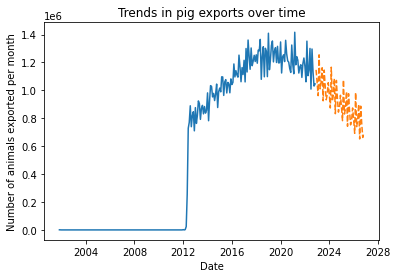

In [74]:
# ATTEMPTING TO CREATE A PREDICTION MODEL FOR THE EXPORT TREND...

# load the data
df = pd.read_csv('all_exports.csv', parse_dates=['transport_date'])

# resample the data to monthly frequency and set the index
monthly_data = (df.set_index('transport_date')
                .resample('MS')
                .agg({'num_animals': 'sum'})
               )

# fit a seasonal ARIMA model
model = SARIMAX(monthly_data, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()

# forecast future values
forecast = results.forecast(steps=48)

# plot the historical and forecasted values
plt.plot(monthly_data.index, monthly_data.values)
plt.plot(forecast.index, forecast.values, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of animals exported per month')
plt.title('Trends in pig exports over time')
plt.show()
